<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/Animal_image_detection_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
x_train=pd.read_csv('/content/drive/MyDrive/Classroom/PGDDM 44 python/input.csv',header=None)
x_test=pd.read_csv('/content/input_test.csv',header=None)
y_train=pd.read_csv('/content/labels.csv',header=None)
y_test=pd.read_csv('/content/labels_test.csv',header=None)



In [80]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,37.0,39.0,25.0,26.0,24.0,9.0,34.0,25.0,10.0,49.0,...,21.0,67.0,63.0,38.0,78.0,74.0,49.0,58.0,54.0,29.0
1,131.0,128.0,135.0,160.0,157.0,164.0,198.0,192.0,204.0,204.0,...,65.0,63.0,91.0,69.0,62.0,87.0,65.0,71.0,96.0,74.0
2,80.0,92.0,88.0,83.0,96.0,89.0,76.0,92.0,82.0,74.0,...,99.0,133.0,128.0,109.0,119.0,114.0,94.0,124.0,119.0,99.0
3,149.0,173.0,151.0,131.0,153.0,132.0,156.0,173.0,155.0,143.0,...,57.0,48.0,48.0,58.0,51.0,51.0,61.0,56.0,56.0,66.0
4,255.0,254.0,239.0,253.0,246.0,228.0,255.0,252.0,233.0,254.0,...,234.0,255.0,254.0,234.0,255.0,254.0,234.0,254.0,253.0,233.0


In [81]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,118.0,82.0,96.0,109.0,71.0,82.0,116.0,77.0,78.0,111.0,...,37.0,123.0,73.0,40.0,139.0,82.0,29.0,140.0,79.0,16.0
1,223.0,211.0,163.0,223.0,209.0,160.0,244.0,228.0,179.0,226.0,...,65.0,69.0,73.0,76.0,69.0,72.0,77.0,70.0,73.0,78.0
2,73.0,67.0,43.0,75.0,69.0,45.0,79.0,71.0,50.0,80.0,...,168.0,224.0,213.0,167.0,223.0,212.0,166.0,222.0,211.0,165.0
3,0.0,3.0,1.0,18.0,24.0,22.0,34.0,40.0,38.0,0.0,...,13.0,6.0,6.0,8.0,6.0,7.0,9.0,10.0,11.0,13.0
4,27.0,55.0,76.0,73.0,105.0,126.0,115.0,151.0,175.0,105.0,...,151.0,178.0,164.0,163.0,193.0,175.0,171.0,183.0,164.0,158.0


In [82]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [83]:
y_test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [84]:
x_train.shape

(2000, 30000)

In [85]:
x_test.shape

(400, 30000)

In [86]:
y_train.shape

(2000, 1)

In [87]:
y_test.shape

(400, 1)

In [88]:
import numpy as np
x_train=np.loadtxt('/content/drive/MyDrive/Classroom/PGDDM 44 python/input.csv',delimiter=',')
y_train=np.loadtxt('/content/labels.csv',delimiter=',')
x_test=np.loadtxt('/content/input_test.csv',delimiter=',')
y_test=np.loadtxt('/content/labels_test.csv',delimiter=',')

In [89]:
x_train=x_train.reshape(len(x_train),100,100,3)
x_test=x_test.reshape(len(x_test),100,100,3)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [90]:
x_train.shape

(2000, 100, 100, 3)

In [91]:
x_train=x_train/255
x_test=x_test/255

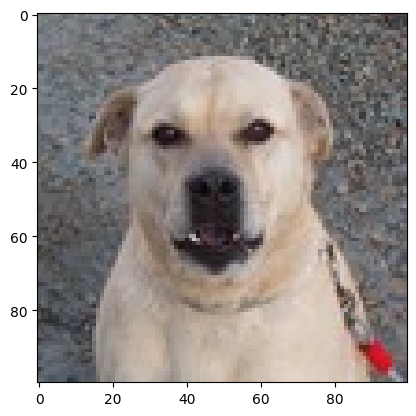

In [93]:
plt.imshow(x_train[5, : ])
plt.show()

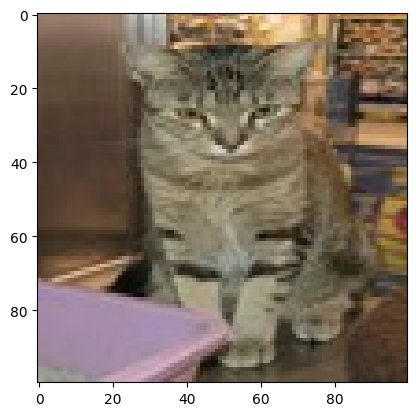

In [104]:
plt.imshow(x_train[1547])
plt.show()

Creating CNN Model

In [111]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [113]:
model= tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [116]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.5468 - loss: 0.6727
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.6887 - loss: 0.6064
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.7896 - loss: 0.4766
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.8584 - loss: 0.3691
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.9172 - loss: 0.2618
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 0.9514 - loss: 0.1956
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - accuracy: 0.9706 - loss: 0.1354
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - accuracy: 0.9864 - loss: 0.0856
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.9899 - loss: 0.0770
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.9971 - loss: 0.0411


#batch_size= 64, training data will be divided into mini batches of 64

In [118]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 421ms/step - accuracy: 0.9974 - loss: 0.0358
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - accuracy: 0.9992 - loss: 0.0226
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 424ms/step - accuracy: 0.9999 - loss: 0.0171
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 469ms/step - accuracy: 1.0000 - loss: 0.0145
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - accuracy: 1.0000 - loss: 0.0130
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 1.0000 - loss: 0.0102
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 465ms/step - accuracy: 1.0000 - loss: 0.0084
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 517ms/step - accuracy: 1.0000 - loss: 0.0079
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 1.0000 - loss: 0.0078


In [121]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.6623 - loss: 1.1794


[1.0594568252563477, 0.6850000023841858]

In [122]:
model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


array([[1.81939796e-01],
       [3.31782438e-02],
       [8.14365327e-01],
       [8.81188154e-01],
       [1.09970169e-05],
       [2.43345485e-03],
       [9.98550117e-01],
       [1.84185919e-04],
       [9.97035742e-01],
       [9.92325902e-01],
       [3.46250445e-01],
       [7.54339900e-03],
       [1.01164871e-04],
       [3.00534943e-04],
       [9.70717147e-02],
       [9.98635769e-01],
       [5.01118377e-02],
       [5.42595051e-04],
       [1.23547604e-02],
       [7.20266283e-01],
       [2.06730142e-02],
       [1.73519339e-07],
       [5.17697845e-06],
       [6.77391291e-01],
       [7.68840015e-01],
       [9.26983915e-03],
       [9.92991984e-01],
       [7.86621213e-01],
       [2.82760918e-01],
       [1.61475711e-09],
       [1.34233036e-03],
       [4.44509864e-01],
       [3.63964550e-02],
       [9.99922276e-01],
       [5.01670502e-02],
       [1.64255034e-02],
       [4.59517509e-01],
       [9.99973476e-01],
       [1.97702900e-01],
       [2.95240170e-04],


In [124]:
y_pred=model.predict(x_test)
y_pred[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


array([0.1819398], dtype=float32)

In [125]:
y_test[0]

array([0.])

In [128]:
y_pred[21]

array([1.7351934e-07], dtype=float32)

In [129]:
y_test[21]

array([0.])

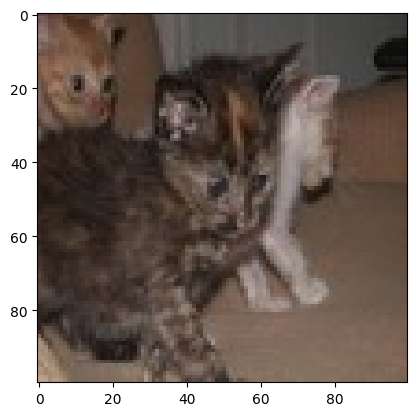

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Our Model Say's it's a Cat


In [140]:
plt.imshow(x_test[399])
plt.show()

y_pred=model.predict(x_test[399].reshape(1,100,100,3))
if y_pred<0.5:
  print("Our Model Say's it's a Dog")
else:
  print("Our Model Say's it's a Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Our Model Say's it's a Dog


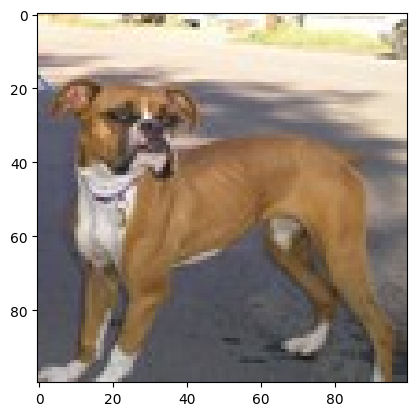

In [144]:
plt.imshow(x_test[1])
plt.show

y_pred=model.predict(x_test[1].reshape(1,100,100,3))
if y_pred<0.5:
  print("Our Model Say's it's a Dog")
else:
  print("Our Model Say's it's a Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Our Model Say's it's a Dog


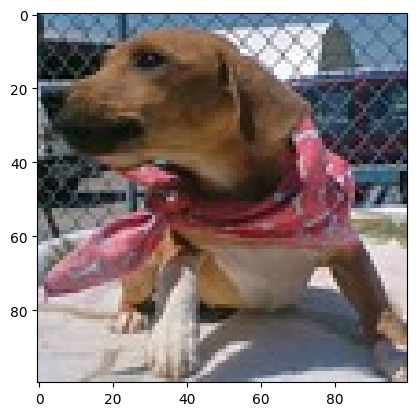

In [146]:
y_pred=model.predict(x_test[4].reshape(1,100,100,3))
if y_pred<0.5:
  print("Our Model Say's it's a Dog")
else:
  print("Our Model Say's it's a Cat")
plt.imshow(x_test[4])
plt.show()

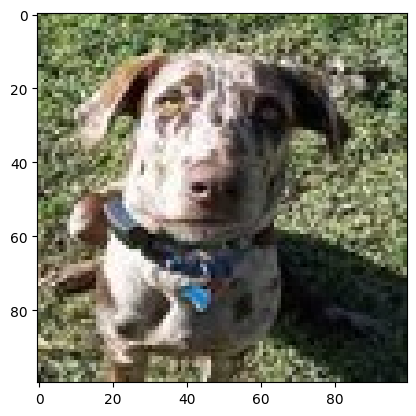

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Our Model Say's it's a Dog


In [160]:
id=np.random.randint(0,len(x_test))
plt.imshow(x_test[id])
plt.show()

y_pred=model.predict(x_test[id].reshape(1,100,100,3))
if y_pred<0.5:
  print("Our Model Say's it's a Dog")
else:
  print("Our Model Say's it's a Cat")